<a href="https://colab.research.google.com/github/tentenvi/IIS/blob/main/%D0%98%D0%98%D0%A15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Вариант 17**

In [46]:
!pip install -U tensorflow
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 889.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incomp

In [29]:
# 1. Исходные данные

data = {
    "X": [1.88219441, 3.60999919, 3.06763299, 3.02767924, 0.2260256, 3.06030521, 2.19981755, 2.27422834, 2.88522933,
          2.72069683, 0.07672581, 2.42463002, 0.35273536, 1.81448486, 1.09263444, 1.10176058, 1.04392017, 2.05549945,
          1.67930912, 3.3120898, 2.54823306, 7.44839032, 7.71560938, 8.15129473, 7.4314264, 7.64613249, 7.10385762,
          7.56347691, 7.25420615, 6.52045987, 6.19912925, 7.54485119, 7.58966145, 7.48681078, 7.01188093, 7.82334258,
          6.60015832, 7.89988696, 6.72085567, 6.35272592, 6.52621442, 7.7263398, 12.73058278, 12.10871608, 12.06900359,
          12.79438549, 12.86586639, 12.44272805, 12.60921583, 12.78691159, 12.09578422, 12.19239457, 13.03043585,
          13.21365968, 13.62028683, 11.71490422, 13.05941119, 12.24851252, 12.8301398, 12.85198561, 13.8710386,
          12.20145878, 13.49781274, 22.83944375, 22.71773361, 22.20233431, 21.40782882, 19.86282703, 19.62861597,
          23.38528144, 20.42448849, 22.48605676, 20.9624448, 23.04837586, 20.9804067, 23.56394531, 21.87646378,
          22.87305666, 20.68482362, 18.01886635, 22.87968286, 23.17236093, 22.79172781, 20.10405196],
    "Y": [5.91357602, 5.71720156, 5.64673844, 5.78549799, 5.55261473, 5.46940684, 5.34282361, 5.08374821, 5.47401524,
          4.72973106, 5.88232172, 5.21930685, 5.02815225, 5.69804199, 5.33068121, 4.91578724, 4.9263991, 5.84176733,
          4.97184416, 5.39948441, 5.6766804, 0.27002691, 1.70121286, 0.80771049, 1.40481115, 1.37117699, 0.97524549,
          2.0490305, 1.30680333, 1.44080598, 2.38260993, 1.34817621, 2.11231454, 0.40094891, 1.73314474, 0.97441275,
          1.81525834, 0.99765601, 1.58167678, 1.63064963, 1.31431192, 1.10032563, 9.37458047, 10.08011068, 9.47550504,
          10.83448041, 8.91304608, 9.59646664, 10.92901815, 10.09898923, 10.36552116, 5.93371723, 8.78230259,
          9.11358504, 9.10565395, 11.57080594, 8.7886965, 7.53601648, 8.81045596, 6.07211884, 8.70094601, 8.76589023,
          7.80382065, 16.48499806, 16.39563888, 17.96765007, 22.08023697, 16.73452782, 18.70634448, 16.79163597,
          19.63269147, 21.62247278, 17.34036213, 17.35839431, 18.27149038, 18.55960866, 16.65988763, 14.4733385,
          15.5652611, 16.44131684, 18.12847195, 18.93901798, 19.24430176, 18.09033645],
    "class": ['Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4']
}

# pd.DataFrame(data).to_csv("data.csv")

# Создание DataFrame для удобства
df = pd.DataFrame(data)
print(df.head())

          X         Y   class
0  1.882194  5.913576  Group1
1  3.609999  5.717202  Group1
2  3.067633  5.646738  Group1
3  3.027679  5.785498  Group1
4  0.226026  5.552615  Group1


In [30]:
# 2. Подготовка данных
X = np.c_[data["X"], data["Y"]]

# Нормирование входных данных
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Кодирование выходных данных
ohe = OneHotEncoder(sparse_output=False)
Y_encoded = ohe.fit_transform(np.array(data["class"]).reshape(-1, 1))

# Разделение данных на обучающий и тестовый наборы
xTrain, xTest, yTrain, yTest = train_test_split(X_norm, Y_encoded, test_size=0.25)

In [31]:
# 3. Создание и обучение нейронной сети
model = Sequential([
    Dense(units=4, activation="relu", input_shape=(2,)),
    Dense(units=4, activation="relu"),
    Dense(units=yTrain.shape[1], activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])
model.summary()

# Обучение модели
history = model.fit(xTrain, yTrain, epochs=80, batch_size=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.2693 - loss: 1.3151
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4351 - loss: 1.3016 
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4530 - loss: 1.2853  
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3857 - loss: 1.2979  
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.3601 - loss: 1.3105 
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4999 - loss: 1.2645  
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4622 - loss: 1.2886  
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.4882 - loss: 1.2567  
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4989 - loss: 1.2589  
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.4887 - loss: 1.2688 
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

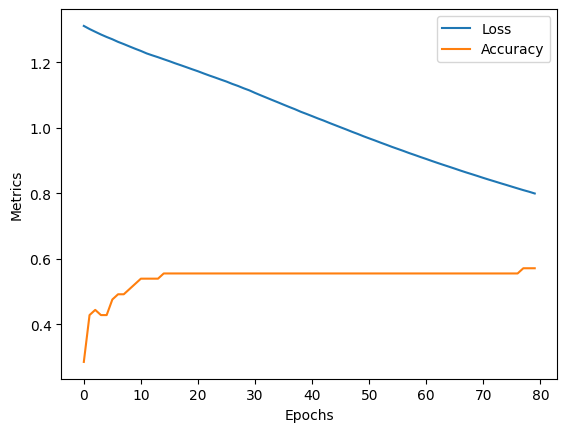

In [32]:
# 4. Визуализация метрик
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["categorical_accuracy"], label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.show()

In [33]:
# 5. Оценка модели на тестовой выборке
test_loss, test_accuracy = model.evaluate(xTest, yTest)
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - categorical_accuracy: 0.3810 - loss: 0.9827
Точность на тестовой выборке: 0.3810


In [34]:
# Проверка предсказаний
correct_predictions = 0
for i in range(len(xTest)):
    x = xTest[i]
    y_true = yTest[i]
    y_pred = model.predict(x.reshape(1, -1))

    pred_class = np.argmax(y_pred)
    true_class = np.argmax(y_true)

    if pred_class == true_class:
        correct_predictions += 1
    print(f"Предсказано: {ohe.categories_[0][pred_class]}, фактический: {ohe.categories_[0][true_class]}")

print(f"Количество верно классифицированных примеров: {correct_predictions} из {len(xTest)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Предсказано: Group2, фактический: Group2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Предсказано: Group2, фактический: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Предсказано: Group4, фактический: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Предсказано: Group2, фактический: Group2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Предсказано: Group4, фактический: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Предсказано: Group2, фактический: Group2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Предсказано: Group4, фактический: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Предсказано: Group2, фактический: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Предсказано: Group4, фактический: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Предсказано: Group2, фактический: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Предсказано: Group4, фактический: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Предсказано: Group4, фактический: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Предсказано: G